# Double Pendulum Simulation

## Overview
This folder contains a Python implementation of the double pendulum system, modeled using Lagrangian mechanics. The code simulates the chaotic motion of the system, allowing for multiple simulations with different initial conditions. The resulting motion is animated, showing the behavior of each pendulum in real time.

## What is the Double Pendulum?
The double pendulum is a classic physical system consisting of two masses (pendulums) attached by rigid rods, where one mass is suspended from the other. Due to the interaction between the two masses, the system exhibits complex, non-linear, and chaotic motion, which is highly sensitive to initial conditions.

The motion of the double pendulum is described using the **Lagrangian** formulation of mechanics. The Lagrangian, denoted as **L**, is the difference between the system's kinetic energy (**T**) and potential energy (**V**):

$$ L = T - V $$

In the chosen coordinate system, $x$ and $y$ are expressed as follows:

- $x_1 = l_1 \cos(\theta_1)$
- $x_2 = l_2 \sin(\theta_1)$

### Kinetic Energy (T)
The kinetic energy of the system accounts for both masses moving with their respective velocities. The velocities are related to the angular velocities of the two pendulums, as well as their positions.

- **T₁**: The kinetic energy of the first mass (m₁) depends on its angular velocity **dθ₁/dt** and the length of the first pendulum.
  
$$ T_1 = \frac{1}{2} m_1 \left( \dot{x_1}^2 + \dot{y_1}^2 \right) $$

Where:
- $\dot{x_1} = l_1 \dot{\theta_1} \cos(\theta_1)$
- $\dot{y_1} = l_1 \dot{\theta_1} \sin(\theta_1)$

- **T₂**: The kinetic energy of the second mass (m₂) depends on its angular velocity **dθ₂/dt** and also includes contributions from the motion of the first pendulum, as the second pendulum is attached to it.

$$ T_2 = \frac{1}{2} m_2 \left( \dot{x_2}^2 + \dot{y_2}^2 \right) $$

Where:
- $\dot{x_2} = \dot{x_1} + l_2 \dot{\theta_2} \cos(\theta_2)$
- $\dot{y_2} = \dot{y_1} + l_2 \dot{\theta_2} \sin(\theta_2)$

Thus, the total kinetic energy of the system is:

$$ T = T_1 + T_2 $$

### Potential Energy (V)
The potential energy of the system is due to the gravitational forces acting on both masses, which depends on their vertical positions.

- **V₁**: The potential energy of the first mass (m₁) is determined by its height above a reference level, which is proportional to the cosine of the angle **θ₁**.

$$ V_1 = -m_1 g l_1 \cos(\theta_1) $$

- **V₂**: The potential energy of the second mass (m₂) depends on both the angle **θ₂** of the second pendulum and the position of the first pendulum.

$$ V_2 = -m_2 g \left( l_1 \cos(\theta_1) + l_2 \cos(\theta_2) \right) $$

Thus, the total potential energy of the system is:

$$ V = V_1 + V_2 $$

### Lagrange's Equations of Motion
To describe the system's behavior, we use **Lagrange's equations of motion**, derived from the Lagrangian:

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta_1}} \right) - \frac{\partial L}{\partial \theta_1} = 0 $$

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta_2}} \right) - \frac{\partial L}{\partial \theta_2} = 0 $$

These equations result in two second-order differential equations that describe the angular accelerations **d²θ₁/dt²** and **d²θ₂/dt²** for the two pendulums.

### Numerical Simulation
The equations of motion are solved numerically using the `scipy.integrate.solve_ivp` function to integrate the system of ordinary differential equations. Initial conditions such as the angles and angular velocities of the two pendulums can be adjusted to observe different behaviors.


------------------------------------

Importing the Essential Libraries

In [41]:
import numpy as np
from scipy.integrate import odeint
import sympy as sm

Defining Symbols and Variables Using `sympy.symbols()`

In [42]:
t = sm.symbols('t')

m_1, m_2, g = sm.symbols('m_1 m_2 g', positive=True)

the1, the2 = sm.symbols(r'\theta_1, \theta_2', cls=sm.Function) # sm.Function states that the position is a function

the1 = the1(t) # Specifying the variable
the2 = the2(t)

x1 = sm.sin(the1)
y1 = -sm.cos(the1)

x2 = x1 + sm.sin(the2)
y2 = y1 + -sm.cos(the2)

x1

sin(\theta_1(t))

Calculating the first and second derivative of $\theta_i$: $\frac{d\theta_i}{dt}$ and $\frac{d^2\theta_i}{dt^2}$, As well as ${v_x}_i$ and ${v_y}_i$ (for Energies) using `sympy.diff()`

i = 1 -> for the $1^{st}$ mass

i = 2 -> for the $2^{nd}$ mass


In [43]:
the1_d = sm.diff(the1, t) # Angular Velocity
the1_dd = sm.diff(the1_d, t) # Angular Acceleration

x1_d = sm.diff(x1, t)
y1_d = sm.diff(y1, t)

the2_d = sm.diff(the2, t) # Angular Velocity
the2_dd = sm.diff(the2_d, t) # Angular Acceleration

x2_d = sm.diff(x2, t)
y2_d = sm.diff(y2, t)


Defining Kinetic $T$ and Potential Energies $V$ and the Lagrangian $L$ for the double pendulum for each mass.

$ T = \frac{1}{2} \ m \ ((\frac{dx(t)}{dt})^2 + (\frac{dy(t)}{dt})^2) $ 

$ V = m \ g \ y(t) $

$ L = T - V $

In [44]:
T_1 = 1/2 * m_1 * ((x1_d)**2+(y1_d)**2)
T_2 = 1/2 * m_2 * ((x2_d)**2+(y2_d)**2)

V_1 = m_1 * g * y1
V_2 = m_2 * g * y2

L = T_1 + T_2 - (V_2 + V_1)

We formulate Lagrange's Equation for a non-damped system, since we have two mass, we have two equations $q = \{\theta_1, \theta_2 \}$:

$ \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta_1}}\right) - \frac{\partial L}{\partial \theta_1} = 0
 $

$ \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta_2}}\right) - \frac{\partial L}{\partial \theta_2} = 0
 $



In [45]:

LE1 = sm.diff(sm.diff(L, the1_d), t) - sm.diff(L, the1)
LE2 = sm.diff(sm.diff(L, the2_d), t) - sm.diff(L, the2)

# use .simplyfy() if necessary
LE1 = LE1.simplify()
LE2 = LE2.simplify()


We create a function that solves Lagrange's equation numerically for the double pendulum system.

- **`sm.solve([LE1, LE2], the1_dd, the2_dd)`:** This solves the equations `LE1` and `LE2` for `the1_dd` and `the2_dd` respectively. The result is an array containing the solutions:

$\frac{d^2 \theta_1}{dt^2} = ...$ `# solutions[the1_dd]`

$\frac{d^2 \theta_2}{dt^2} = ...$ `# solutions[the2_dd]`


We convert the symbolic solutions into numerical functions using `sm.lambdify()`, it takes the specified variables as input and computes the second derivative of the position with respect to time according to Lagrange's equation.

In [46]:
solutions = sm.solve([LE1, LE2], the1_dd, the2_dd)
LEF1 = sm.lambdify((the1, the2, the1_d, the2_d, t, m_1, m_2, g), solutions[the1_dd])
LEF2 = sm.lambdify((the1, the2, the1_d, the2_d, t, m_1, m_2, g), solutions[the2_dd])


We solve our problem numerically using `odeint()` the provided function of `scipy.integrate`.
We are interessted in finding the angles and angular velocities of the two mass in form of a vector:

$ \vec{y} = (\theta_1, \dot{\theta_1}, \theta_2, \dot{\theta_2})$

In numerical analysis, the Runge–Kutta are a family of implicit and explicit iterative methods, which include the Euler method, used in temporal discretization for the approximate solutions of simultaneous nonlinear equations.

$ \vec{y}_{n+1} = \vec{y}_{n} + \Delta t \ f(y_n, t) $

To make it simpler think of it as the Euler Method:

$ \vec{y}_{n+1} = \vec{y}_{n} + \Delta t \ \frac{d\vec{y}}{dt} $

In other words, we have the following numerical scheme:

$ {\theta_1}_{i+1} = {\theta_1}_{i} + \Delta t \ \frac{d\theta_1}{dt} $

$ \dot{\theta_1}_{i+1} = \dot{\theta_1}_{i} + \Delta t \ \frac{d^2\theta_1}{dt^2} $

$ {\theta_2}_{i+1} = {\theta_2}_{i} + \Delta t \ \frac{d\theta_2}{dt} $

$ \dot{\theta_2}_{i+1} = \dot{\theta_2}_{i} + \Delta t \ \frac{d^2\theta_2}{dt^2} $

In other words:

$ \vec{y}_{i+1} = \vec{y}_{i} + \Delta t \ \frac{d\vec{y}}{dt} $


In [47]:
# Initial conditions & Constants
initial_conditions = [np.pi/4, 5.0, np.pi/4, 0.0]  # Angle_1, Velocity_1, Angle_2, Velocity_2, 
m1_val = 1
m2_val = 1
g_val = 9.81

# Function representing the system of first-order ODEs
def system_of_odes(y, t, m_1, m_2, g):
    the1, the1_d, the2, the2_d = y

    the1_dd = LEF1(the1, the2, the1_d, the2_d, t, m_1, m_2, g)
    the2_dd = LEF2(the1, the2, the1_d, the2_d, t, m_1, m_2, g)

    return [the1_d, the1_dd, the2_d, the2_dd]

# Time points for numerical solution
time_points = np.linspace(0, 5, 501)

# Solve the system of ODEs
solution = odeint(system_of_odes, initial_conditions, time_points, args=(m1_val, m2_val, g_val))

# [ [the1_0, the1_d_0, the2_0, the2_d_0], t=0
#   [the1_1, the1_d_1, the2_1, the2_d_1], t=t1
#   [the1_2, the1_d_2, the2_2, the2_d_2], t=t2
# ...

# Extract position and velocity from the solution
the1_sol = solution[:, 0]
the1_d_sol = solution[:, 1]

the2_sol = solution[:, 2]
the2_d_sol = solution[:, 3]

x1_pendulum = np.sin(the1_sol)
y1_pendulum = -np.cos(the1_sol)

x2_pendulum = x1_pendulum + np.sin(the2_sol)
y2_pendulum = y1_pendulum + -np.cos(the2_sol)


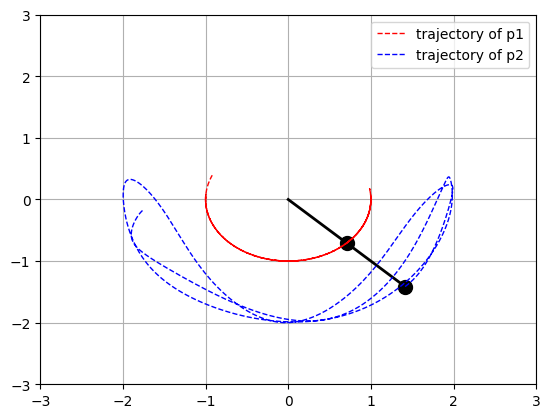

In [48]:
import matplotlib.pyplot as plt

def update(frame):
    pendulum1.set_data([0, x1_pendulum[frame]], [0, y1_pendulum[frame]])
    mass1.set_data([x1_pendulum[frame]], [y1_pendulum[frame]])

    pendulum2.set_data([x1_pendulum[frame], x2_pendulum[frame]], [y1_pendulum[frame], y2_pendulum[frame]])
    mass2.set_data([x1_pendulum[frame]], [y1_pendulum[frame]])

    return pendulum1, mass1

fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

pendulum1, = ax.plot([0, x1_pendulum[0]], [0, y1_pendulum[0]], lw=2, color='black')
pendulum2, = ax.plot([x1_pendulum[0], x2_pendulum[0]], [y1_pendulum[0], y2_pendulum[0]], lw=2, color='black')

mass1, = ax.plot([x1_pendulum[0]], [y1_pendulum[0]], 'o', markersize=10, color='black')
mass2, = ax.plot([x2_pendulum[0]], [y2_pendulum[0]], 'o', markersize=10, color='black')

trajectory_pendulum1, = ax.plot(x1_pendulum, y1_pendulum, '--', lw=1, color='red', label='trajectory of p1')
trajectory_pendulum2, = ax.plot(x2_pendulum, y2_pendulum, '--', lw=1, color='blue', label='trajectory of p2')

plt.legend()
plt.grid()
plt.show()
